# 数据分析岗位薪资及需求报告
# Analysis of salary and quantity requirement of data analysts in China

日期/Date：2018-1-17

作者/Author：黄慧婷/Huiting Huang

数据来源/Data source: 网络/Internet

数据说明/Data description: 17个字段（17 fields）：
city（城市）
companyFullName（公司名称）
companyId（公司id）
companyLabelList（公司标签）
companyShortName（公司简称）
companySize（公司规模）
businessZones（商圈）
firstType（工作类型1）
secondType（工作类型2）
education（学历要求）
industryField（行业领域）
positionId（职位id）
positionAdvantage（职位优势）
positionName（职位名称）
positionLables（职位标签）
salary（职位薪水）
workYear（经验要求）

# 目标 Objects

通过对数据分析岗位薪资和需求的分析，给已经是数据分析师以及即将成为数据分析师的人一点参考

Sharing information of salary and quantity requirments of data analysts in main cities in China with people who are data analysts and want to be data analysts 

主要分析问题 Questions to be analyzed:

1.数据分析师岗位需求 Position requirments

    1.0 数据分析岗位需求的地域性分布 Quantity requirements in different cities

    1.1 不同城市，不同学历数据分析的岗位需求 Requirement of data analysts at different education levels in different cities

    1.2 不同城市，不同工作经验数据分析的岗位需求 Requirement of data analysts of different working experience in different cities

    1.3 各城市数据分析岗位需求最大的前五的企业 Top 5 companies of the largest requirements 
    
    1.4 各城市需求最大的前5类数据分析岗位 Top 5 positions about data analysis in different cities
    
    1.5 不同行业数据分析岗位需求分析 Quantity requirement in different industries

2.薪酬分布的情况 Salaries of data analysts

    2.0 整体薪酬分布情况 Overall distribution of salary

    2.1 不同城市数据分析岗位的薪酬情况 Salary distribution of data analysts in different cities

    2.2 不同学历数据分析岗位的薪酬情况 Salary distribution of data analysts at different education levels

    2.3 不同工作经验数据分析岗位的薪酬情况 Salary distribution of data analysts with different working experience

    2.4 不同城市，不同学历数据分析岗位的薪酬情况  Salary distribution of data analysts at different education levels in different cities

    2.5 不同城市，不同工作经验数据分析岗位的薪酬情况 Salary distribution of data analysts with different working experience in different cities
 
 3.数据分析岗位关键字分析 Word cloud of keywords of position about data analysis


# 数据加载 Data loading

In [2]:
# import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.font_manager import FontProperties
font_zh = FontProperties(fname="C:/Windows/Fonts/msyh.ttf")

In [3]:
#read csv file inculding data to be analyzed
df = pd.read_csv('DataAnalyst.csv',encoding = 'gb2312')
#retrieve the first five rows in the dataset
df.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生


In [4]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 17 columns):
city                 6876 non-null object
companyFullName      6876 non-null object
companyId            6876 non-null int64
companyLabelList     6170 non-null object
companyShortName     6876 non-null object
companySize          6876 non-null object
businessZones        4873 non-null object
firstType            6869 non-null object
secondType           6870 non-null object
education            6876 non-null object
industryField        6876 non-null object
positionId           6876 non-null int64
positionAdvantage    6876 non-null object
positionName         6876 non-null object
positionLables       6844 non-null object
salary               6876 non-null object
workYear             6876 non-null object
dtypes: int64(2), object(15)
memory usage: 913.3+ KB


# 数据规整化 Data wrangling

去除重复项 Drop duplicated records

In [5]:
#the number of unique records
len(df.positionId.unique())

5031

In [6]:
#drop duplicated recordes
#load cleaned data to a new data frame:df_duplicates
df_duplicates = df.drop_duplicates(subset = 'positionId',keep='first')
#df_duplicates.head(5)
df_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 0 to 6766
Data columns (total 17 columns):
city                 5031 non-null object
companyFullName      5031 non-null object
companyId            5031 non-null int64
companyLabelList     4529 non-null object
companyShortName     5031 non-null object
companySize          5031 non-null object
businessZones        3535 non-null object
firstType            5027 non-null object
secondType           5028 non-null object
education            5031 non-null object
industryField        5031 non-null object
positionId           5031 non-null int64
positionAdvantage    5031 non-null object
positionName         5031 non-null object
positionLables       5007 non-null object
salary               5031 non-null object
workYear             5031 non-null object
dtypes: int64(2), object(15)
memory usage: 707.5+ KB


处理“薪资”脏数据 Clean data in the field 'salary'

In [7]:
#define a function to clean data in 'salary' column to get bottom salary 
#and top salary of each position
def cut_word(word,method):
    position = word.find('-')
    length = len(word)
    if position !=-1:
        bottomSalary = word[:position-1]
        topSalary = word[position+1:length-1]
    else:
        bottomSalary = word[:word.upper().find('K')]
        topSalary = bottomSalary
    if method == 'bottom':
        return bottomSalary
    else:
        return topSalary

In [8]:
#add new fields 'bottomSalary' and 'topSalary' to the dupicated data frame
df_duplicates['bottomSalary'] = df_duplicates.salary.apply(cut_word,method = 'bottom')
df_duplicates['topSalary'] = df_duplicates.salary.apply(cut_word,method = 'top')

#calculate average salary of each position
df_duplicates['bottomSalary'] = df_duplicates['bottomSalary'].astype('int')
df_duplicates['topSalary'] = df_duplicates['topSalary'].astype('int')

df_duplicates['aveSalary'] = df_duplicates.apply(lambda x:(x.bottomSalary+x.topSalary)/2,axis=1)

D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [9]:
#Rename a column name 
df_duplicates.rename(columns = {'positionLables':'positionLabels'},inplace = True)

#assign the cleaned data to a new data frame
df_clean = df_duplicates[['city','companyShortName','companySize',
                         'education','positionName','positionLabels',
                         'workYear','aveSalary','industryField']]
df_clean.info()
df_clean.head()

D:\Program Files\Anaconda2\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 0 to 6766
Data columns (total 9 columns):
city                5031 non-null object
companyShortName    5031 non-null object
companySize         5031 non-null object
education           5031 non-null object
positionName        5031 non-null object
positionLabels      5007 non-null object
workYear            5031 non-null object
aveSalary           5031 non-null int64
industryField       5031 non-null object
dtypes: int64(1), object(8)
memory usage: 393.0+ KB


,city,companyShortName,companySize,education,positionName,positionLabels,workYear,aveSalary,industryField
0,上海,1号店,2000人以上,硕士,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,8,移动互联网
1,上海,点融网,500-2000人,本科,数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,12,金融
2,上海,SPD,50-150人,本科,数据分析师,"['分析师', '数据分析', '数据']",应届毕业生,5,移动互联网
3,上海,数云,150-500人,本科,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",应届毕业生,7,"企业服务,数据服务"
4,上海,银基富力,15-50人,本科,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",应届毕业生,2,其他


# 数据分析 Data exploration

# 1.数据分析岗位需求

1.1.数据分析岗位需求的地域性分布 Quantity requirements in different cities

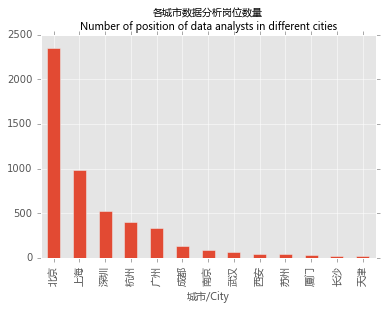

In [42]:
#the number of positions in different cites

#df_clean.city.value_counts()

ax = df_clean.city.value_counts().plot(kind='bar')

for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)
ax.set_title(u'各城市数据分析岗位数量\nNumber of position of data analysts in different cities',fontproperties=font_zh)
ax.set_xlabel(u'城市/City',fontproperties=font_zh)

# 分析 Analysis: 
数据分析岗位大量集中在北上广深以及杭州五个城市，其中，北京的数据分析师需求量最大，远远超过其他城市。北京的需求量超过排名第二的上海，同时上海的需求量又是广深杭各自需求量的两倍多。除了排名前五的五个城市，在中国的其他城市中，数据分析岗位的需求少于100。

Job opprtunities of data analysts mainly can be found in Beijing,Shanghai,Shenzhen,Guangzhou and Hangzhou. Among these cities, Beijing has the the largest requirement of data analysts,which is more than twice as many as in Shanghai,in which there is the second largest requirement. And the requirement in Shanghai is also more than double the quantity in the rest three cities,respectively. Except for these five first-tier cities,there are less than 100 positions in demand in other cites in China.

1.2. 不同城市，不同学历的岗位需求 Requirement of data analysts at different education levels in different cities

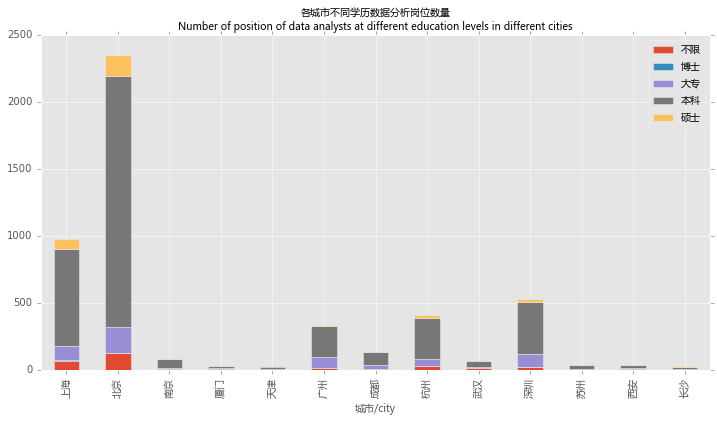

In [11]:
#the number of positions at different education levels in different cities
ax = df_clean.groupby(['city','education']).aveSalary.count().unstack().plot(kind = 'bar',stacked = True,figsize= (12,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)
ax.set_title(u'各城市不同学历数据分析岗位数量\nNumber of position of data analysts at different education levels in different cities',fontproperties=font_zh)
ax.set_xlabel(u'城市/city',fontproperties = font_zh)
leg = ax.legend(loc='upper right',prop=font_zh)
leg.get_frame().set_alpha(0.5)

# 分析 Analysis
大多数（约80%）的数据分析岗位要求应聘者拥有本科学历，硕士学历并不是获得一份数据分析工作的必要条件。大专学历也有机会获得一份数据分析师的工作，尽管这种机会只有大约10%并且主要集中在一线城市。几乎没有数据分析岗位需要博士学位。

Most data analysts(around 80%) are required to obtain a bachelor degree and a master diploma is not necessary to get a job offer. People who with the diplomas which is lower than the bachelor level also can compete for some job opportunities,which though are around 10% and mainly appears in first-tier cities. There barely are positions required doctor diplomas.

1.3.不同城市，不同工作经验岗位需求 Salary distribution of data analysts with different working experience

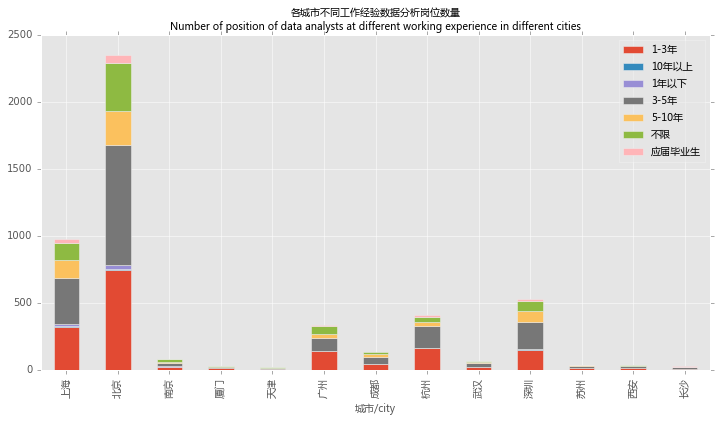

In [37]:
# the number of positions at different working experience in different cities
ax = df_clean.groupby(['city','workYear']).aveSalary.count().unstack().plot(kind = 'bar',stacked = True,figsize = (12,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)
ax.set_title(u'各城市不同工作经验数据分析岗位数量\nNumber of position of data analysts at different working experience in different cities',fontproperties=font_zh)
ax.set_xlabel(u'城市/city',fontproperties = font_zh)
leg = ax.legend(loc='upper right',prop=font_zh)
leg.get_frame().set_alpha(0.5)

# 分析 Analysis
大多数数据分析岗位要求1-3年或者3-5年经验，这些岗位占了市场的70%-80%。有大约10%-20%的数据分析岗位接受任何经验程度的求职者，包括应届毕业生。有些大型企业会招聘一定数量的应届毕业生，来从头培养自己企业需要的人才。这大概是因为有些时候企业急需数据分析人才，因此他们会降低对求职者的要求。

Most positions about data analysis require working experience of 1-3 years or 3-5 years. These positions accounts for 70%-80% of all the data analysts in the job market. 10%-20% of positions can accept job hunters with different working experience including graduates.This could be caused by the fact that sometimes companies are in desperate need of data analysts so that they will lower the requirements of job seeks. Large enterprises usually recruite a quantity of gratuates without working experience to cultivate them to be the employers they need.

1.4.各城市需求最大的前5类数据分析岗位 Top 5 positions about data analysis in different cities

In [25]:
#the top 5 companies requiring the most positions of analyst in different cities
def topN(df,n=5):
    counts = df.value_counts()
    return counts.sort_values(ascending = False)[:n]

In [26]:
df_top_company = df_clean.groupby('city')['companyShortName'].apply(topN).reset_index()
df_top_company.columns = [u'城市/city',u'公司名称/companyShortName',u'职位数量/the number of positions']
df_top_company1 = df_top_company.set_index(u'城市/city')

#Retrieve top 5 companies recruiting most positions in five cities:Beijing,Shanghai,Guangzhou,Shenzhen,Hangzhou
df_top_company1.ix[[u'北京',u'上海',u'广州',u'深圳',u'杭州'],:]

,公司名称/companyShortName,职位数量/the number of positions
城市/city,,
北京,美团点评,156
北京,滴滴出行,60
北京,百度,39
北京,今日头条,32
北京,百度外卖,31
上海,饿了么,23
上海,美团点评,19
上海,返利网,15
上海,买单侠,15


# 分析 Analysis

招聘数据分析师最多的企业是在北京的美团点评，达到156个。其余城市招聘数据分析师最多的几家公司数量都在10-30之间。

The company which needs the most data analysts is Meituan,which is like Yelp, in Bejing. Meituan offers 156 position available. The requirement of data analysts in the top 5 companies in other cities is around 10-30.

1.5 不同行业数据分析岗位需求分析 Quantity requirement in different industries

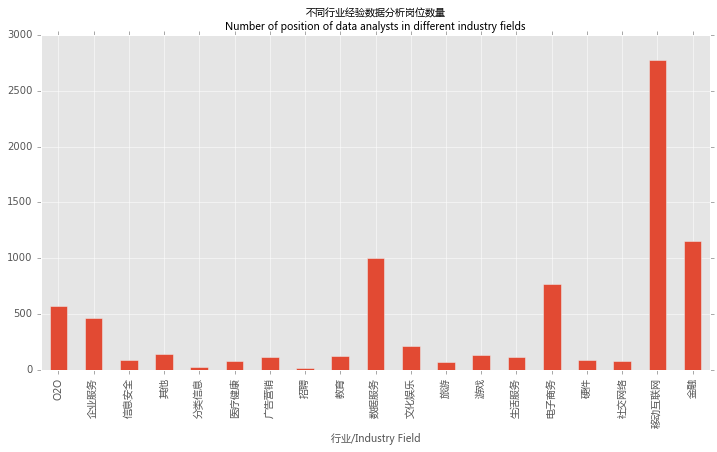

In [102]:
#Calculate the number of each field label

df_industryField = df_clean.industryField.str.replace(u'、',',').str.replace(' ','').str.split(',').apply(pd.value_counts).stack().reset_index()
df_industryField.columns = ['level_0','Field','num']
#df_industryField.index.str.replace(" ","")

ax = df_industryField.groupby('Field').num.count().plot(kind = 'bar',figsize = (12,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)
ax.set_title(u'不同行业经验数据分析岗位数量\nNumber of position of data analysts in different industry fields',fontproperties=font_zh)
ax.set_xlabel(u'行业/Industry Field',fontproperties = font_zh)

# 分析 Analysis
从行业领域来看，大部分数据分析岗位的需求集中在移动互联网，金融，数据服务，电子商务，企业服务和O2O。其中，大约一般的工作机会出现在移动互联网领域。其余的岗位机会也出现在社交网络，医疗健康，广告，教育，旅游和游戏等行业。

In respect of industry fields, the requirement of data analysts mostly can be seen in the industries like mobile Internet,finance,data service,electric commerce and business service and O2O. Among these in dustrirs, around half job opportinuties can be found in mobile Internet. The rest positions can be found in social media,medical treatment and health,advertisement,education,tourism and game,etc.


# 2.薪酬分布的情况 Salaries of data analysts

2.0 整体薪酬分布情况 Overall distribution of salary

In [103]:
#descriptive statistics of average salary
df_clean.describe()

,aveSalary
count,5031.000000
mean,16.898231
std,9.017918
min,1.000000
25%,11.000000
50%,15.000000
75%,22.000000
max,75.000000


# 分析 Analysis
从描述统计的结果来看，数据分析工资的均值在16k，最少1k，最多可以达到75k。

From the result of descriptive statistics of salary, the average salary of data analysts is around 16k. The minimum is 1k,while the maximun can be up to 75k.

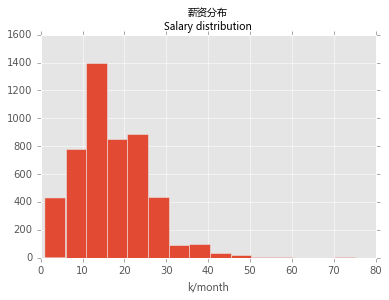

In [108]:
# Salary distribution
ax = df_clean.aveSalary.hist(bins =15)
ax.set_title(u'薪资分布\nSalary distribution',fontproperties=font_zh)
ax.set_xlabel(u'k/month',fontproperties = font_zh)
ax.set_yticks(range(0,1800,200))

# 分析 Analysis
数据分析师的薪资分布是一个右偏分布，说明只有少数人能拿到高薪。大多数的薪资集中在5k-25k。

The distribution of salary is right-skewed, which means only few of people can be paid high salaries. The most salaries are concentrated between 5k to 25k. 

 2.1 不同城市数据分析岗位的薪酬情况 Salary distribution of data analysts in different cities

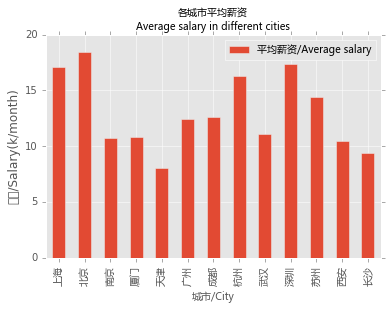

In [115]:
#Average salary in different cities
ax = df_clean.groupby('city').aveSalary.mean().plot(kind = 'bar',label = u'平均薪资/Average salary')
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)
ax.legend(prop=font_zh)
ax.set_title(u'各城市平均薪资\nAverage salary in different cities',fontproperties=font_zh)
ax.set_xlabel(u'城市/City',fontproperties = font_zh)
ax.set_ylabel(u'薪资/Salary(k/month)')

# 分析 Analysis
大多数城市的平均薪水高于10k。北京，上海，深圳和广州的薪水高于15k但低于20k。

The average salary in most cities are above 10k. The average salary in Beijing,Shanghai,Shenzhen and Hangzhou are above 15k but less than 20k.

D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


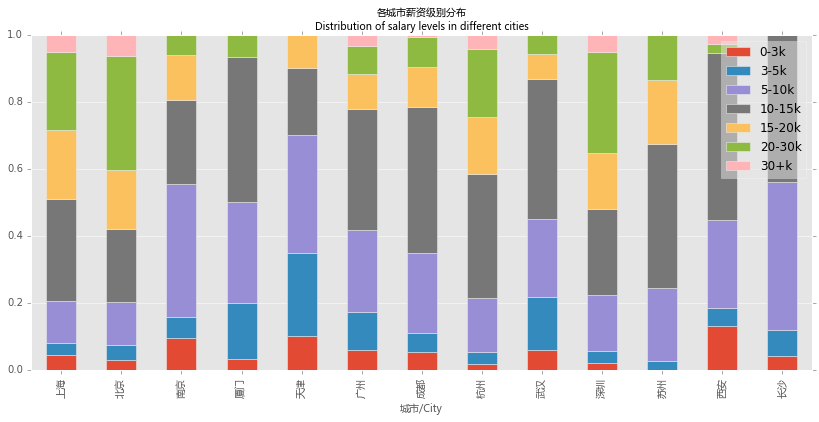

In [112]:
#set salary levels 
bins = [0,3,5,10,15,20,30,100]
level = ['0-3k','3-5k','5-10k','10-15k','15-20k','20-30k','30+k']
df_clean['level']=pd.cut(df_clean['aveSalary'],bins = bins,labels = level)

#plot distribution of salary levels in different cities
df_level = df_clean.groupby(['city','level']).aveSalary.count().unstack()
df_level_prop = df_level.apply(lambda x:x/x.sum(),axis = 1)
ax = df_level_prop.plot(kind = 'bar',stacked = True,figsize=(14,6))

for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)
leg = ax.legend(loc = 'upper right')
leg.get_frame().set_alpha(0.5)
ax.set_title(u'各城市薪资级别分布\nDistribution of salary levels in different cities',fontproperties=font_zh)
ax.set_xlabel(u'城市/City',fontproperties = font_zh)


# 分析 analysis
把工资水平分成7个等级：0-3k,3-5k,5-10k,10-15k,15-20k 和 20-30k。其中大多的工资处于5-10k和10-15k这一档。对于一线城市来说，高薪（15-20k，20-30k）的比例远远高于其他非一线城市，超过30k的薪水更是只出现在北上广深以及杭州和西安。

The salary of data analysts is divided into 7 levels:0-3k,3-5k,5-10k,10-15k,15-20k and 20-30k. Most salaries fall in the intervals 5-10k and 10-15k.However, in first-tier cities, the proportion of high salaries(15-20k and 20-30k) is much larger than that in other cities, and the salaries more than 30k only can be seen in Beijing,Shanghai,Guangzhou,Shenzhen,Hangzhou and Xi'an. 

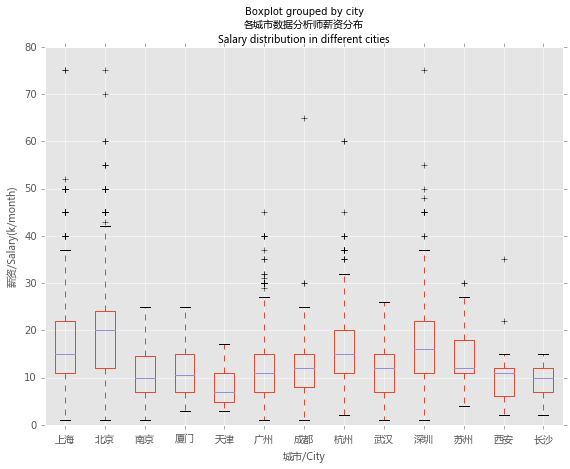

In [35]:
#Salary in different cities

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1)
df_clean.boxplot(column = 'aveSalary',by='city',ax=ax,figsize=(9,7))

for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)   
ax.set_title(u'各城市数据分析师薪资分布\nSalary distribution in different cities',fontproperties=font_zh)
ax.set_xlabel(u'城市/City',fontproperties=font_zh)
ax.set_ylabel(u'薪资/Salary(k/month)',fontproperties=font_zh)

# 分析 Analysis
数据分析师工资的中位数的最高值依然出现在一线城市，与之前的分析结果相对应。而高于30k的数据分析师工资最大值只出现在北京，上海，杭州和深圳，并没有广州。广州作为中国的第三大城市，其薪资最大值和中位数均低于准一线城市杭州。杭州数据分析师的高薪可能是由于互联网行业在杭州的高度发展和约一半的数据分析岗位出现在互联网行业，正如之前不同行业数据分析岗位需求的分析结果所示。

The highest medians of salary are in first-tier cities,which is consistent with what has been shown in previous figures. The maximums which are higher than 30k only can be found in Beijing,Shanghai,Hangzhou and Shenzhen.The maximum and median of salary in Guangzhou, the third biggest city in China, is lower than Hangzhou,which is usually considered less economically important than Guangzhou. This could be the result of high development of Internet industry in Hangzhou and data analysts are highly required in mobile Internet industry, which is shown in the figure 'Number of position of data analysts in different industry fields'. 

2.2 不同学历数据分析岗位的薪酬情况 Salary distribution of data analysts at different education levels

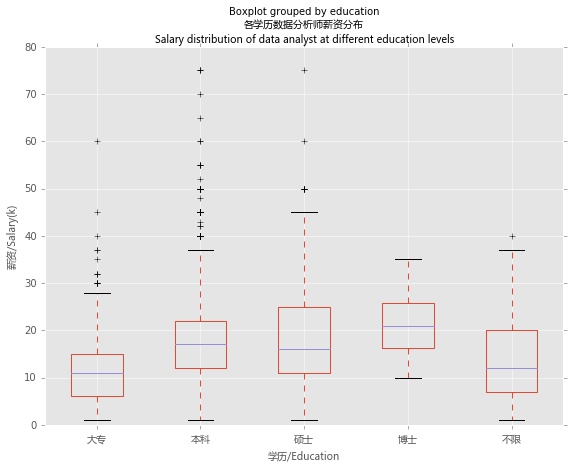

In [34]:
#sort education levels from high to low
#for item in df_clean.education.unique():
    #print item
edu_myOrder = pd.Series([u'大专',u'本科',u'硕士',u'博士',u'不限'])
#print edu_myOrder
for i in range(len(edu_myOrder)):
    df_clean.education = df_clean.education.replace(edu_myOrder[i],i)

#Salary distribution at different working experience
df_clean.education.sort_values()
ax = df_clean.boxplot(column = 'aveSalary',by = 'education',figsize=(9,7))

for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)   
ax.set_title(u'各学历数据分析师薪资分布\nSalary distribution of data analyst at different education levels',fontproperties=font_zh)
ax.set_xlabel(u'学历/Education',fontproperties=font_zh)
ax.set_ylabel(u'薪资/Salary(k)',fontproperties=font_zh)
ax.set_xticklabels(edu_myOrder,fontproperties=font_zh)

# 分析 Analysis
整体上，数据分析师的薪水随着教育程度的升高而得到提升。但是硕士学历的数据分析师薪水的中位数和本科学历基本相当，甚至还稍微低一些，不过硕士学历薪水的最大值要高于博士生。事实上这并不意味着硕士生薪水要高于博士，因为通常招聘信息中对学历的要求是最低要求，这意味着需要硕士学位的数据分析岗位博士生也可以做。博士学位完全可以拿到最高薪资。

In general, the salary of data analysts goes up with increase of education backgroud. However, the median of masters are almost the same as,even a little bit lower than, that of bachelors and the maximum of salary for masters are higher than doctors. This does not mean that salary of masters is higher than that of doctors. Usually the requirement of education backgroud of a position is the minimum,which means the positions requiring mansters also can be offered to doctors.So the doctors could also be paid the highest salary.

2.3 不同工作经验数据分析岗位的薪酬情况 Salary distribution of data analysts with different working experience

D:\Program Files\Anaconda2\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


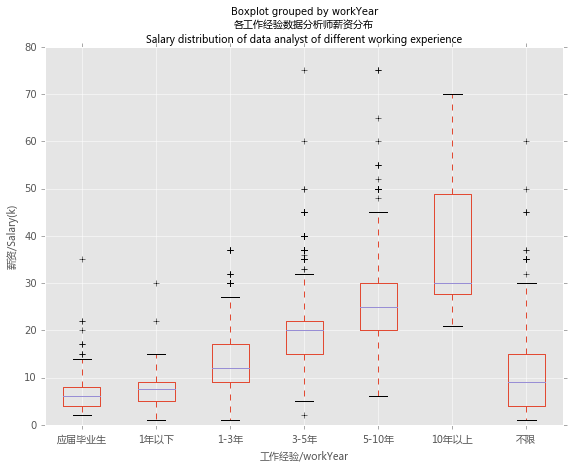

In [10]:
#sort working experience from high to low

#for item in df_clean.workYear.unique():
    #print item

wky_myOrder = pd.Series([u'应届毕业生',u'1年以下',u'1-3年',u'3-5年',u'5-10年',u'10年以上',u'不限'])
for i in range(len(wky_myOrder)):
    df_clean.workYear = df_clean.workYear.replace(wky_myOrder[i],i)

#Salary distribution at different working experience
ax = df_clean.boxplot(column = 'aveSalary',by = 'workYear',figsize=(9,7))

for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)   
ax.set_title(u'各工作经验数据分析师薪资分布\nSalary distribution of data analyst of different working experience',fontproperties=font_zh)
ax.set_xlabel(u'工作经验/workYear',fontproperties=font_zh)
ax.set_ylabel(u'薪资/Salary(k)',fontproperties=font_zh)
ax.set_xticklabels(wky_myOrder,fontproperties=font_zh)

# 分析 Analysis
薪水随着工作经验的增加而增长。数据分析师工作经验超过一年就能拿到10k以上的工资了。

Salary increases as the working experience accumulates. Data analysts can get salary more than 10k after working for just one year. 

 2.4 不同城市，不同学历数据分析岗位的薪酬情况 Salary distribution of data analysts at different education levels in different cities

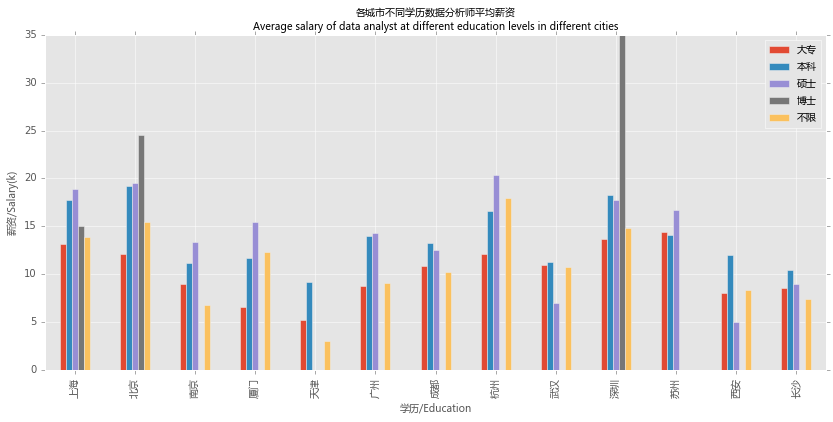

In [30]:
ax = df_clean.groupby(['city','education']).aveSalary.mean().unstack().plot(kind='bar',figsize = (14,6))

for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)
ax.legend([u'大专',u'本科',u'硕士',u'博士',u'不限'],prop=font_zh)
ax.set_title(u'各城市不同学历数据分析师平均薪资\nAverage salary of data analyst at different education levels in different cities',fontproperties=font_zh)
ax.set_xlabel(u'学历/Education',fontproperties=font_zh)
ax.set_ylabel(u'薪资/Salary(k)',fontproperties=font_zh)

# 分析 Analysis
在大多数城市中，拥有硕士学位的数据分析师平均薪资要高于本科学历，而本科学历要高于大专学历。这意味着在数据分析岗位中，高学历还是可以提高薪资竞争力的。从上图中可以看出最高薪资出现在要求博士学历岗位的深圳，但是实际情况中，其他城市可能出现更高的薪水。因为这里计算的是招聘信息中的薪资区间的平均薪水，数据分析师在应聘时实际拿到的薪水可能高于或者低于这个平均值。而对于需要博士学历的数据分析岗位本来就很少，薪水根据岗位需求和个人能力变化也会比较大。

In most cities,average salary of data analysts with master diplomas is higher than analysts with bachelor diplomas, and salary of bachelors is higher than that of analysts with lower education background. This means higher education background can enhance the salary competitiveness of data analysts. The positions requiring doctor diplomas in Shenzhen offers the highest salary. However, it is likely that the highest salary is found in other cities. Because the average salary of the salary interver shown in the recruitment information is calculated in the figure above. In fact, the salary can be higher and lower. The positions requiring doctor diplomas accounts for small proportion of the whole job market and the salary of each position varies,depengding on the requirement of the position and  the capability of competitors.

2.5 不同城市，不同工作经验数据分析岗位的薪酬情况 Salary distribution of data analysts with different working experience in different cities

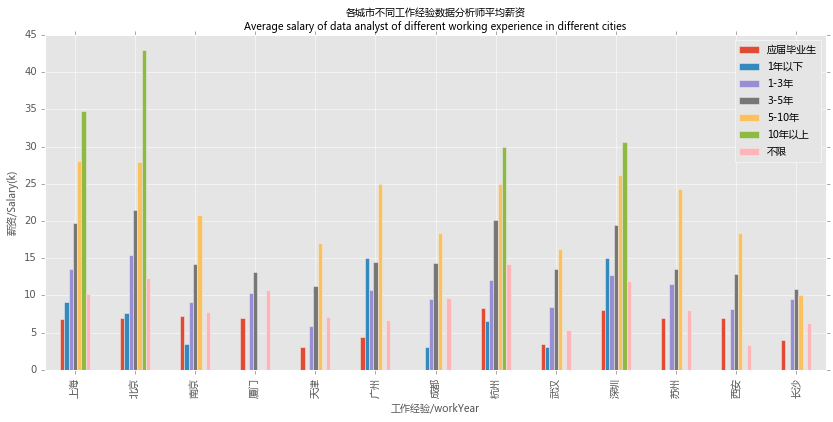

In [12]:
ax = df_clean.groupby(['city','workYear']).aveSalary.mean().unstack().plot(kind='bar',figsize = (14,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)
ax.legend([u'应届毕业生',u'1年以下',u'1-3年',u'3-5年',u'5-10年',u'10年以上',u'不限'],prop=font_zh)
ax.set_title(u'各城市不同工作经验数据分析师平均薪资\nAverage salary of data analyst of different working experience in different cities',fontproperties=font_zh)
ax.set_xlabel(u'工作经验/workYear',fontproperties=font_zh)
ax.set_ylabel(u'薪资/Salary(k)',fontproperties=font_zh)

# 分析 Analysis
与之前的分析一致，在各城市中工资随着工作经验的增加而增加。需要超过10年经验的数据分析岗位只在北京，上海，深圳和杭州出现。

Generally,salary rises as the working experience increases in different cities, which is consistent with previous analysis. Positions requiring working experience of more than 10 years only can be found in Beijing,Shanghai,Shenzhen and Hangzhou.

3.数据分析岗位关键字分析 Word cloud of keywords of position about data analysis

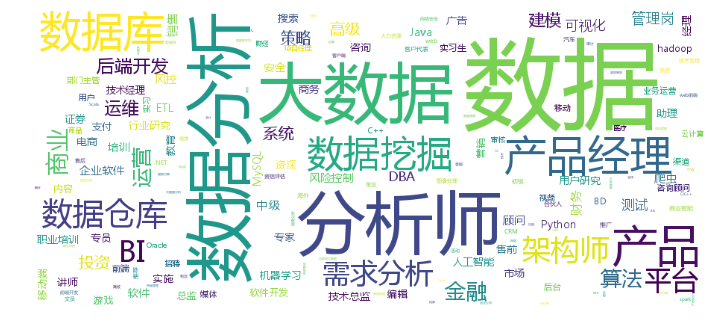

In [16]:
#split label lists in the field 'positionLabels'
word = df_clean.positionLabels.str[1:-1].str.replace(' ','')
df_word = word.dropna().str.split(',').apply(pd.value_counts)

#Count the number of occurence of every label
df_word2 = df_word.stack().reset_index()
df_word2.columns = ['level_0','position_label','num']
df_word2['position_label'] = df_word2['position_label'].str.replace("'","")
df_word_counts = df_word2.groupby('position_label').num.count()
freq = df_word_counts.to_dict()

#Create word cloud of position labels
from wordcloud import WordCloud,ImageColorGenerator 
from os import path  
from scipy.misc import imread 

#back_coloring = imread(path.join("E:/data/apple.png"))

wcloud = WordCloud(font_path="C:/Windows/Fonts/msyh.ttf",
                     width = 900,height = 400,
                     background_color = 'white')
                    #mask=back_coloring

#image_colors = ImageColorGenerator(back_coloring)  

#fig,ax = plt.subplots(figsize=(15,15))
plt.figure(figsize=(12,12))
wcloud.fit_words(freq)
plt.imshow(wcloud)
plt.axis('off')
plt.show()

# 分析 Analysis

数据分析岗位除了“数据”，“数据分析”，“分析师”之外，还与“产品”，“数据挖掘”，“大数据”，“BI”等关键字高度相关。说明数据分析岗位很多出现在金融和互联网行业，数据库及数据挖掘技术是数据分析师应该学习掌握的技术。

Besides the keywords "data","data analysis" and "data analysts",positions of data analysis are highly related to "products","data mining","database"and "BI".This means many positions of data analysis are offered in finance and Internet industry, and database and data mining are the key techniques most data analysts should grasp.

# 结论 Conclusions



本文分析了一份来自招聘网站的数据分析师招聘数据，主要分析了数据分析岗位在不同城市、不同学历、不同工作经验情况下的数量需求以及薪资情况，主要结论总结如下：

1.数据分析这一岗位，有大量的工作机会集中在北上广深以及杭州，其中，北京的数据分析师需求量最大，远远超过其他城市。

2.大多数（约80%）的数据分析岗位要求应聘者拥有本科学历，硕士学历并不是获得一份数据分析工作的必要条件。大专学历也有机会获得一份数据分析师的工作。

3.大多数数据分析岗位要求1-3年或者3-5年经验，这些岗位占了市场的70%-80%。

4.从行业领域来看，大部分数据分析岗位的需求集中在移动互联网，金融，数据服务，电子商务，企业服务和O2O。其中，大约一般的工作机会出现在移动互联网领域。

5.大多数数据分析师的薪资集中在5k-25k，只有少数人能拿到高薪。

6.大多数城市的平均薪水高于10k。对于一线城市来说，高薪（15-20k，20-30k）的比例远远高于其他非一线城市。

7.整体上，数据分析师的薪水随着教育程度的升高和工作经验的积累而得到提升。

8.数据分析岗位很多出现在金融和互联网行业，数据库及数据挖掘技术是数据分析师的重点掌握技术。


This report provides the analysis result of recruitment data of data analysis from a job site. Salary and quantity requirement of data analysis are focused  in this analysis and the main conclusions are:

1.Positions of data analysis mainly can be found in first-tier cities (Beijing,Shanghai,Guangzhou and Shenzhen) and Hangzhou.Among these cities,Beijing has the largest requirement of data analysts,which is much larger than other cities.

2.Around 80% positions require competitors to have bachelor diplomas, a master diploma is not necessary to get a job offer.People with the education background which is lower than a bachelor degree also have chances to obtain a job about data analysis.

3.Most positions(about 70%-80%) require working experience of 1-3 years or 3-5 years. 

4.In respect of industry fields, most job opportunities can be found in mobile Internet, finance, data service,e-commerce, business service and O2O. About half of positions are belonging to mobile Internet.

5.Salary of most data analysts is between 5k to 25k. Only few people can be paid high salary(25k+).

6.Average salary of data analysts are higher than 10k in most cities. The proportion of high salaries(15-20k and 20-30k) in first-tier cities is much larger than other cities.

7.In general, salary of data analysts rises as the increase of education level and the accumulation of working experience.

8.Many positions of data analysis are offered in finance and Internet industry,and database and data mining are the techniques data analysts should grasp.